# **Тема “Обучение без учителя”**

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

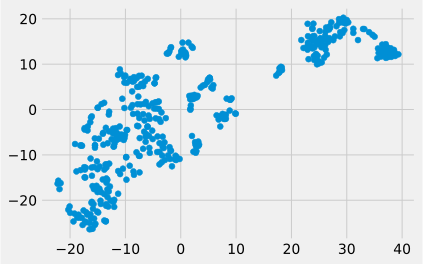

In [7]:
plt.style.use('fivethirtyeight')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

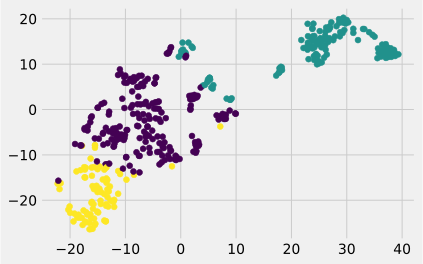

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [10]:
print(f'{round(y_train[labels_train == 0].mean(),2)}, \
      {round(y_train[labels_train == 1].mean(),2)}, \
      {round(y_train[labels_train == 2].mean(),2)}')

24.96,       16.17,       27.79


In [11]:
print(f'{round(X_train.loc[labels_train == 0, "CRIM"].mean(),2)}, \
      {round(X_train.loc[labels_train == 1, "CRIM"].mean(),2)}, \
     {round(X_train.loc[labels_train == 2, "CRIM"].mean(),2)}')

0.42,       10.8,      0.07


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [12]:
labels_test = kmeans.predict(X_test_scaled)

In [13]:
print(f'{round(y_test[labels_test == 0].mean(),2)}, \
      {round(y_test[labels_test == 1].mean(),2)}, \
      {round(y_test[labels_test == 2].mean(),2)}')

21.86,       16.44,       31.35


In [14]:
print(f'{round(X_test.loc[labels_test == 0, "CRIM"].mean(),2)}, \
      {round(X_test.loc[labels_test == 1, "CRIM"].mean(),2)}, \
      {round(X_test.loc[labels_test == 2, "CRIM"].mean(),2)}')

0.27,       10.17,       0.06
